#**Our First Neural Network**

We are going to import the MNIST dataset, and train our first neural network! Don't worry too much about what the arguments / parameters are that we are specifying when we get to the neural net piece; we will go over those elements subsequently.

#*Data and Library Imports*

In [1]:
from platform import python_version

print(python_version())

3.10.9


In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/gburtch/miniconda/bin/python
3.10.9 (main, Jan 11 2023, 09:18:18) [Clang 14.0.6 ]
sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)


In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
from IPython.display import Image

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

We have 60,000 images, and each is made up of 28x28 = 784 pixels.

In [5]:
train_images.shape

(60000, 28, 28)

Pixels take on values between 0 and 255.

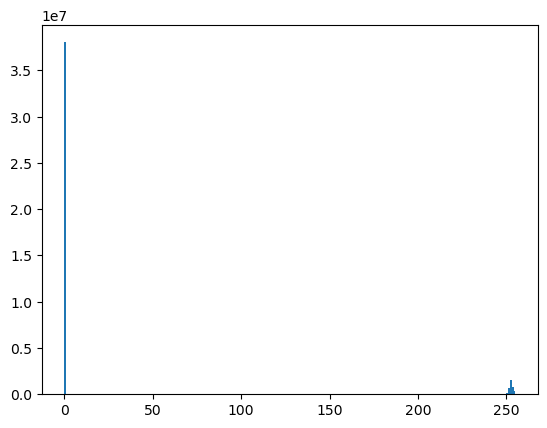

,0
count,4.704000e+07
mean,3.331842e+01
std,7.856749e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550000e+02


In [6]:
train_vector = np.reshape(train_images,-1)

plt.hist(train_vector, bins=256)
plt.title="Histogram of Pixel Values"
plt.show()

pd.DataFrame(train_vector).describe()

Let's see what one of these arrays looks like as a picture... 

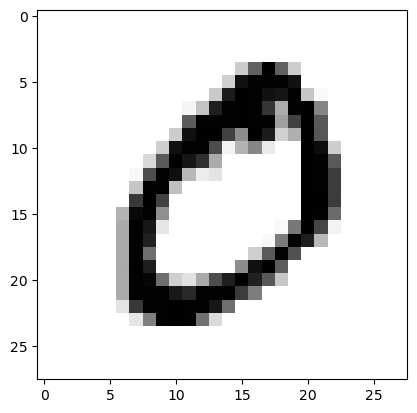

In [6]:
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.show()

Every image array has a single label associated with it, an integer between 0 and 9.

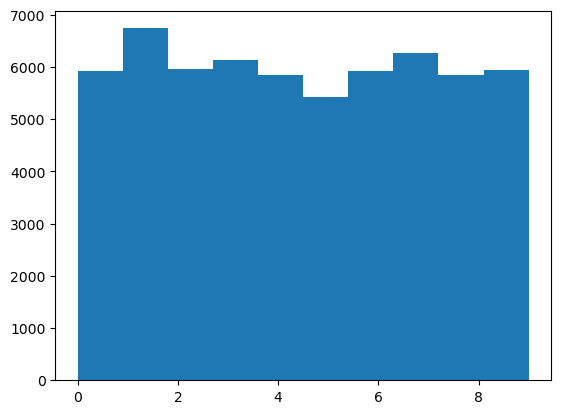

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [7]:
plt.hist(train_labels,bins=10)
plt.show()

pd.DataFrame(np.reshape(train_labels,-1)).describe()

#*Train a Neural Net*

We will instantiate our first neural network. We begin by loading the Keras library, specifying the structure of each layer in the network, and indicating what activation function we will use in each layer. 

In [14]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Next, we will indicate some configuration parameters. In particular, what optimization algorithm to use (RMSProp), what loss function to use (multinomial cross-entropy), and what metric to optimize on (accuracy).

In [17]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Finally, we need to reformat the data. We need to convert the values into floats (fractional values), scaled to the 0-1 range. Further, we need to reshape each of the 28x28 arrays into individual vectors of length 784. 

In [9]:
train_images = train_images.reshape(len(train_images),28*28)
train_images = train_images.astype(float)/255
test_images = test_images.reshape(len(test_images),28*28)
test_images = test_images.astype(float)/255
print(train_images.shape)
test_images.shape

(60000, 784)


(10000, 784)

Now we can 'fit' the model to the training data. We will come back to what these arguments mean, but batch_size refers to the number of observations that are used in a given iteration of the optimization, an epoch refers to a complete run through of iterations such that the entire sample of training data is 'covered' (60000 / 128 batches per epoch in this case). Thus, 5 epochs means that we repeat the optimization procedure over the whole dataset 5 times.



In [18]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2023-03-06 12:53:14.997456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/gburtch/miniconda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/gburtch/miniconda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/gburtch/miniconda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/gburtch/miniconda/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/gburtch/miniconda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/t6/bm2wl03d72j_hgpm0fpb8mkw00h19p/T/ipykernel_13199/2366180367.py", line 1, in <module>
      model.fit(train_images, train_labels, epochs=5, batch_size=128)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/gburtch/miniconda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/gburtch/miniconda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/gburtch/miniconda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/gburtch/miniconda/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/gburtch/miniconda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/t6/bm2wl03d72j_hgpm0fpb8mkw00h19p/T/ipykernel_13199/2366180367.py", line 1, in <module>
      model.fit(train_images, train_labels, epochs=5, batch_size=128)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/gburtch/miniconda/lib/python3.10/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [3584,10] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
	 [[ArgMax/_29]]
  (1) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [3584,10] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_10762]

Now that we have fit the model, we can use it to generate productions on the holdout data. Note that the output is comprised of 10 class labels. The predictions are probabilistic, and sum to 1. So, of the resulting 10 predictions, the index for the highest value is the most probable class.  

In [ ]:
predictions = model.predict(test_images)
predictions[1:5]

array([[3.6144251e-11, 1.9087817e-07, 9.9999964e-01, 7.4062939e-08,
        1.8678016e-17, 4.8710058e-09, 1.2722286e-11, 7.0804596e-17,
        1.8209119e-09, 1.5724455e-16],
       [1.4256794e-07, 9.9912840e-01, 1.6355875e-04, 1.5004550e-05,
        7.7388759e-06, 3.4624031e-06, 4.7226295e-06, 1.8777854e-04,
        4.8707443e-04, 2.1639225e-06],
       [9.9995363e-01, 8.8815255e-10, 2.9017941e-05, 1.2894120e-07,
        1.0134034e-08, 2.1255494e-06, 1.3782760e-06, 3.7380698e-06,
        5.5121645e-09, 9.9050267e-06],
       [9.0073827e-06, 4.1446402e-09, 8.8214925e-05, 6.3586896e-07,
        9.4997090e-01, 6.3517414e-06, 2.1397573e-06, 4.1880834e-04,
        4.4119348e-05, 4.9459830e-02]], dtype=float32)

As you can see, it's very accurate! 

In [ ]:
result = pd.DataFrame(test_labels,np.argmax(predictions,axis=1))
print(result[1:10])

   0
2  2
1  1
0  0
4  4
1  1
4  4
9  9
5  5
9  9


We can use the Keras-inherent functions to return accuracy and loss pretty easily. Notice that the accuracy of predictions in the test data is lower than that in the training data. 

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc: ",test_acc)
test_acc: 0.9785

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9798
test_acc:  0.9797999858856201
